<a href="https://colab.research.google.com/github/AminAb30/Learning_Process/blob/main/FruitDataWhitColor_KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("/fruit_data_with_colors.txt", delimiter="\t")
print(dataset.head(5))
print(dataset.shape)
print(dataset.isnull().sum())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
(59, 7)
fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


In [20]:
X=dataset.iloc[ :, 3:7 ]
y=dataset.iloc[ :, 1 ]
X_train , X_test , y_train, y_test = train_test_split(X , y ,test_size=0.2, random_state=1)


In [15]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
#Runing Scaler made the resoult significantly better!

In [21]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy: {:.2f}'.format(acc*100))

accuracy: 58.33


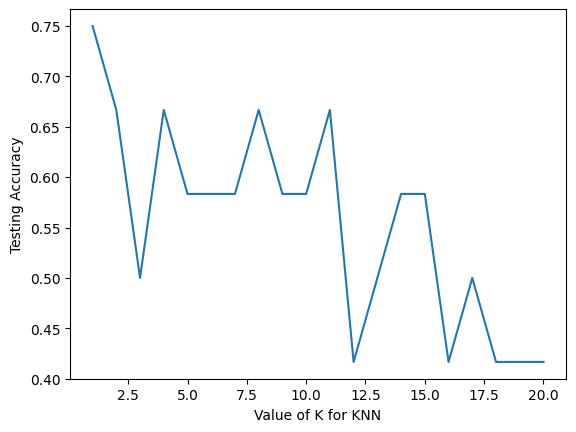

In [22]:
# prompt: i need a graph that shows accuracy for different values of k from 1 to 20

import matplotlib.pyplot as plt
k_range = range(1,21)
accuracy = []

for k in k_range:
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accuracy.append(acc)

plt.plot(k_range, accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()
